In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge

In [22]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    df['Nationality Count'] = df.groupby('Nationality')['Nationality'].transform('count')

    mask_nation = df['Nationality Count'] > 300
    df = df[mask_nation]
    
    return df

In [23]:
df = wrangle('Fifa 23 Players Data.csv')
df.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Nationality Count
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,88,91,67,66,67,62,53,62,22,937
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,84,89,67,67,67,63,58,63,21,963
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,83,86,67,69,67,64,63,64,22,390
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,82,82,82,78,72,78,24,318
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,84,92,70,66,70,66,57,66,21,963
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,35,34,32,34,32,32,32,32,90,318
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,53,47,39,46,39,38,37,38,90,1204
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,81,87,65,62,65,61,56,61,23,382
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,79,73,83,88,83,85,90,85,23,428
10,H. Kane,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,...,84,86,69,71,69,66,64,66,23,1632


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12012 entries, 0 to 18537
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     12012 non-null  object
 1   Full Name                    12012 non-null  object
 2   Overall                      12012 non-null  int64 
 3   Potential                    12012 non-null  int64 
 4   Value(in Euro)               12012 non-null  int64 
 5   Positions Played             12012 non-null  object
 6   Best Position                12012 non-null  object
 7   Nationality                  12012 non-null  object
 8   Image Link                   12012 non-null  object
 9   Age                          12012 non-null  int64 
 10  Height(in cm)                12012 non-null  int64 
 11  Weight(in kg)                12012 non-null  int64 
 12  TotalStats                   12012 non-null  int64 
 13  BaseStats                    12

In [25]:
df.describe().round(decimals=0)

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Nationality Count
count,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,...,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0,12012.0
mean,66.0,71.0,3130632.0,25.0,182.0,75.0,1600.0,358.0,9689.0,5484982.0,...,57.0,58.0,56.0,56.0,56.0,56.0,55.0,56.0,23.0,818.0
std,7.0,6.0,8471077.0,5.0,7.0,7.0,277.0,40.0,21214.0,16349003.0,...,13.0,14.0,14.0,14.0,14.0,14.0,15.0,14.0,15.0,442.0
min,47.0,48.0,0.0,16.0,156.0,54.0,762.0,224.0,0.0,0.0,...,18.0,18.0,17.0,19.0,17.0,17.0,18.0,17.0,10.0,318.0
25%,61.0,67.0,475000.0,21.0,177.0,70.0,1463.0,330.0,1000.0,600000.0,...,52.0,53.0,51.0,49.0,51.0,49.0,45.0,49.0,17.0,390.0
50%,66.0,71.0,975000.0,25.0,182.0,75.0,1638.0,358.0,3000.0,1400000.0,...,60.0,62.0,59.0,59.0,59.0,59.0,58.0,59.0,18.0,728.0
75%,70.0,75.0,2100000.0,29.0,187.0,80.0,1785.0,385.0,8000.0,3300000.0,...,66.0,67.0,66.0,66.0,66.0,65.0,66.0,65.0,20.0,1074.0
max,91.0,95.0,190500000.0,44.0,206.0,105.0,2312.0,502.0,450000.0,366700000.0,...,91.0,92.0,88.0,89.0,88.0,87.0,90.0,87.0,90.0,1632.0


In [26]:
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

England                1632
Germany                1204
Spain                  1074
France                  963
Argentina               937
Brazil                  728
Italy                   623
China PR                439
United States           437
Netherlands             428
Poland                  390
Sweden                  390
Republic of Ireland     385
Portugal                382
Norway                  373
Romania                 341
Saudi Arabia            331
Korea Republic          319
Belgium                 318
Denmark                 318
Name: Nationality, dtype: int64

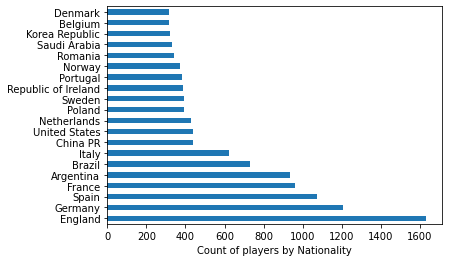

In [27]:
df_nationality_counts.plot(kind="barh")
plt.xlabel("Count of players by Nationality");

In [36]:
file = "players_22.csv"
df = pd.read_csv(file)
df.head(5)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [37]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


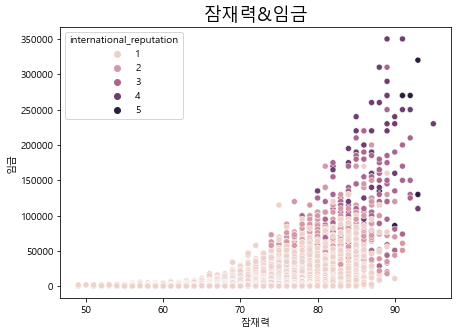

In [50]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("잠재력") 
plt.ylabel("임금")
plt.rc('font',family = 'Malgun Gothic')
plt.title("잠재력&임금", fontsize = 18)
plt.show()

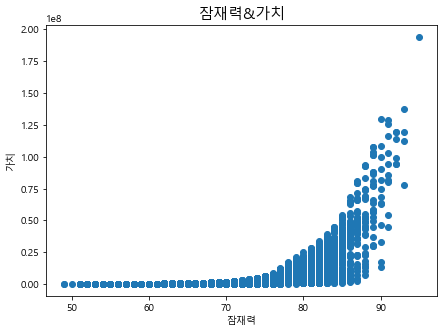

In [49]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("잠재력") 
plt.ylabel("가치")
plt.title("잠재력&가치", fontsize = 15)
plt.show()

In [45]:
top_15 = df.nlargest(15, 'overall')
top_15.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


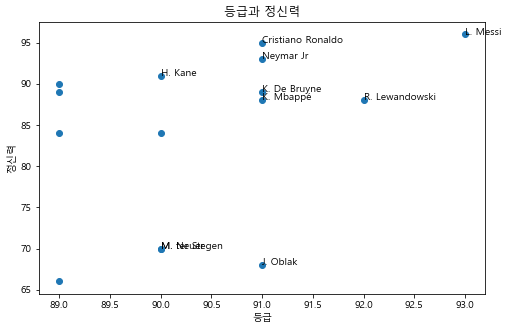

In [48]:
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_15['overall'], top_15['mentality_composure'])

plt.text(top_15.iloc[0]['overall'], top_15.iloc[0]['mentality_composure'], top_15.iloc[0]['short_name'])
plt.text(top_15.iloc[1]['overall'], top_15.iloc[1]['mentality_composure'], top_15.iloc[1]['short_name'])
plt.text(top_15.iloc[2]['overall'], top_15.iloc[2]['mentality_composure'], top_15.iloc[2]['short_name'])
plt.text(top_15.iloc[3]['overall'], top_15.iloc[3]['mentality_composure'], top_15.iloc[3]['short_name'])
plt.text(top_15.iloc[4]['overall'], top_15.iloc[4]['mentality_composure'], top_15.iloc[4]['short_name'])
plt.text(top_15.iloc[5]['overall'], top_15.iloc[5]['mentality_composure'], top_15.iloc[5]['short_name'])
plt.text(top_15.iloc[6]['overall'], top_15.iloc[6]['mentality_composure'], top_15.iloc[6]['short_name'])
plt.text(top_15.iloc[7]['overall'], top_15.iloc[7]['mentality_composure'], top_15.iloc[7]['short_name'])
plt.text(top_15.iloc[8]['overall'], top_15.iloc[8]['mentality_composure'], top_15.iloc[8]['short_name'])
plt.text(top_15.iloc[9]['overall'], top_15.iloc[9]['mentality_composure'], top_15.iloc[9]['short_name'])

ax.set_title("등급과 정신력")
ax.set_ylabel('정신력')
ax.set_xlabel('등급')

plt.show()

In [51]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
bar_plot

{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960}

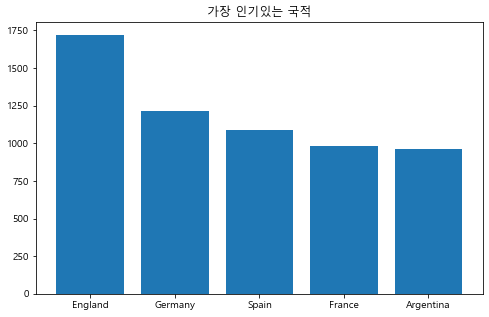

In [53]:
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('가장 인기있는 국적')
plt.show()

In [60]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    ax.set_title('선수포지션')
    plt.show()

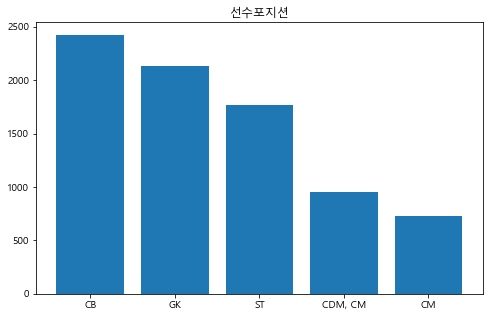

In [62]:
fig, ax = plt.subplots(figsize = (8,5))
plot_most_common('player_positions')
plt.show()

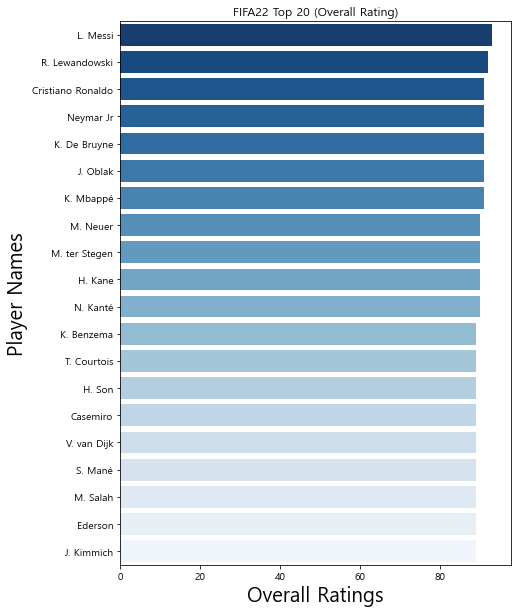

In [63]:
Overall = df["overall"]
footballer_name = df["short_name"]

data = pd.DataFrame({'short_name': footballer_name,'overall':Overall})

x = df['short_name'].head(20) 
y = df['overall'].head(20)

plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 20) 
plt.ylabel('Player Names', size = 20 ) 
plt.title('FIFA22 Top 20 (Overall Rating)')

plt.show()